In [1]:
import scanpy as sc
import pandas as pd
from matplotlib import pylab



/group/testa/Users/davide.castaldi/Polaroid_publication_revisions/.local/lib/python3.8/site-packages/setuptools_scm/_integration/setuptools.py:30: RuntimeWarning: 
ERROR: setuptools==56.1.0 is used in combination with setuptools_scm>=8.x

Your build configuration is incomplete and previously worked by accident!
setuptools_scm requires setuptools>=61

Suggested workaround if applicable:
 - migrating from the deprecated setup_requires mechanism to pep517/518
   and using a pyproject.toml to declare build dependencies
   which are reliably pre-installed before running the build tools

  warnings.warn(


In [2]:
sc.settings.set_figure_params(dpi=100, facecolor='white', dpi_save=500)
pylab.rcParams['figure.figsize'] = (9, 9)


In [3]:
Tanaka = sc.read_h5ad("./data/Tanaka_2020.h5ad")

In [4]:
Tanaka.obs["Annotation"] = Tanaka.obs["Annotation"].cat.rename_categories({"Cortical neuron":"Cortical_neuron",
"Astrocyte":"Astrocyte",
"Neuroepithelial cell":"Neuroepithelial_cell",
"Proteoglycan-expressing cell":"Proteoglycan-expressing_cell",
"Glia progenitor cell":"Glia_progenitor_cell",
"Unfolded protein responsible cell":"Unfolded_protein_responsible_cell",
"BMP responsible cell":"BMP_responsible_cell",
"Oligodendrocyte/OPC":"Oligodendrocyte_OPC",
"Neuron":"Neuron",
"Intermediate":"Intermediate",
"Interneuron":"Interneuron",
"Cilia-bearing cell":"Cilia-bearing_cell",
"Mesoderm":"Mesoderm"})

In [5]:
Tanaka.var_names_make_unique()

In [6]:
Tanaka.obs.columns

Index(['nCount_RNA', 'nFeature_RNA', 'Cluster', 'Cluster_name', 'Annotation',
       'Dataset', 'Protocol', 'Age'],
      dtype='object')

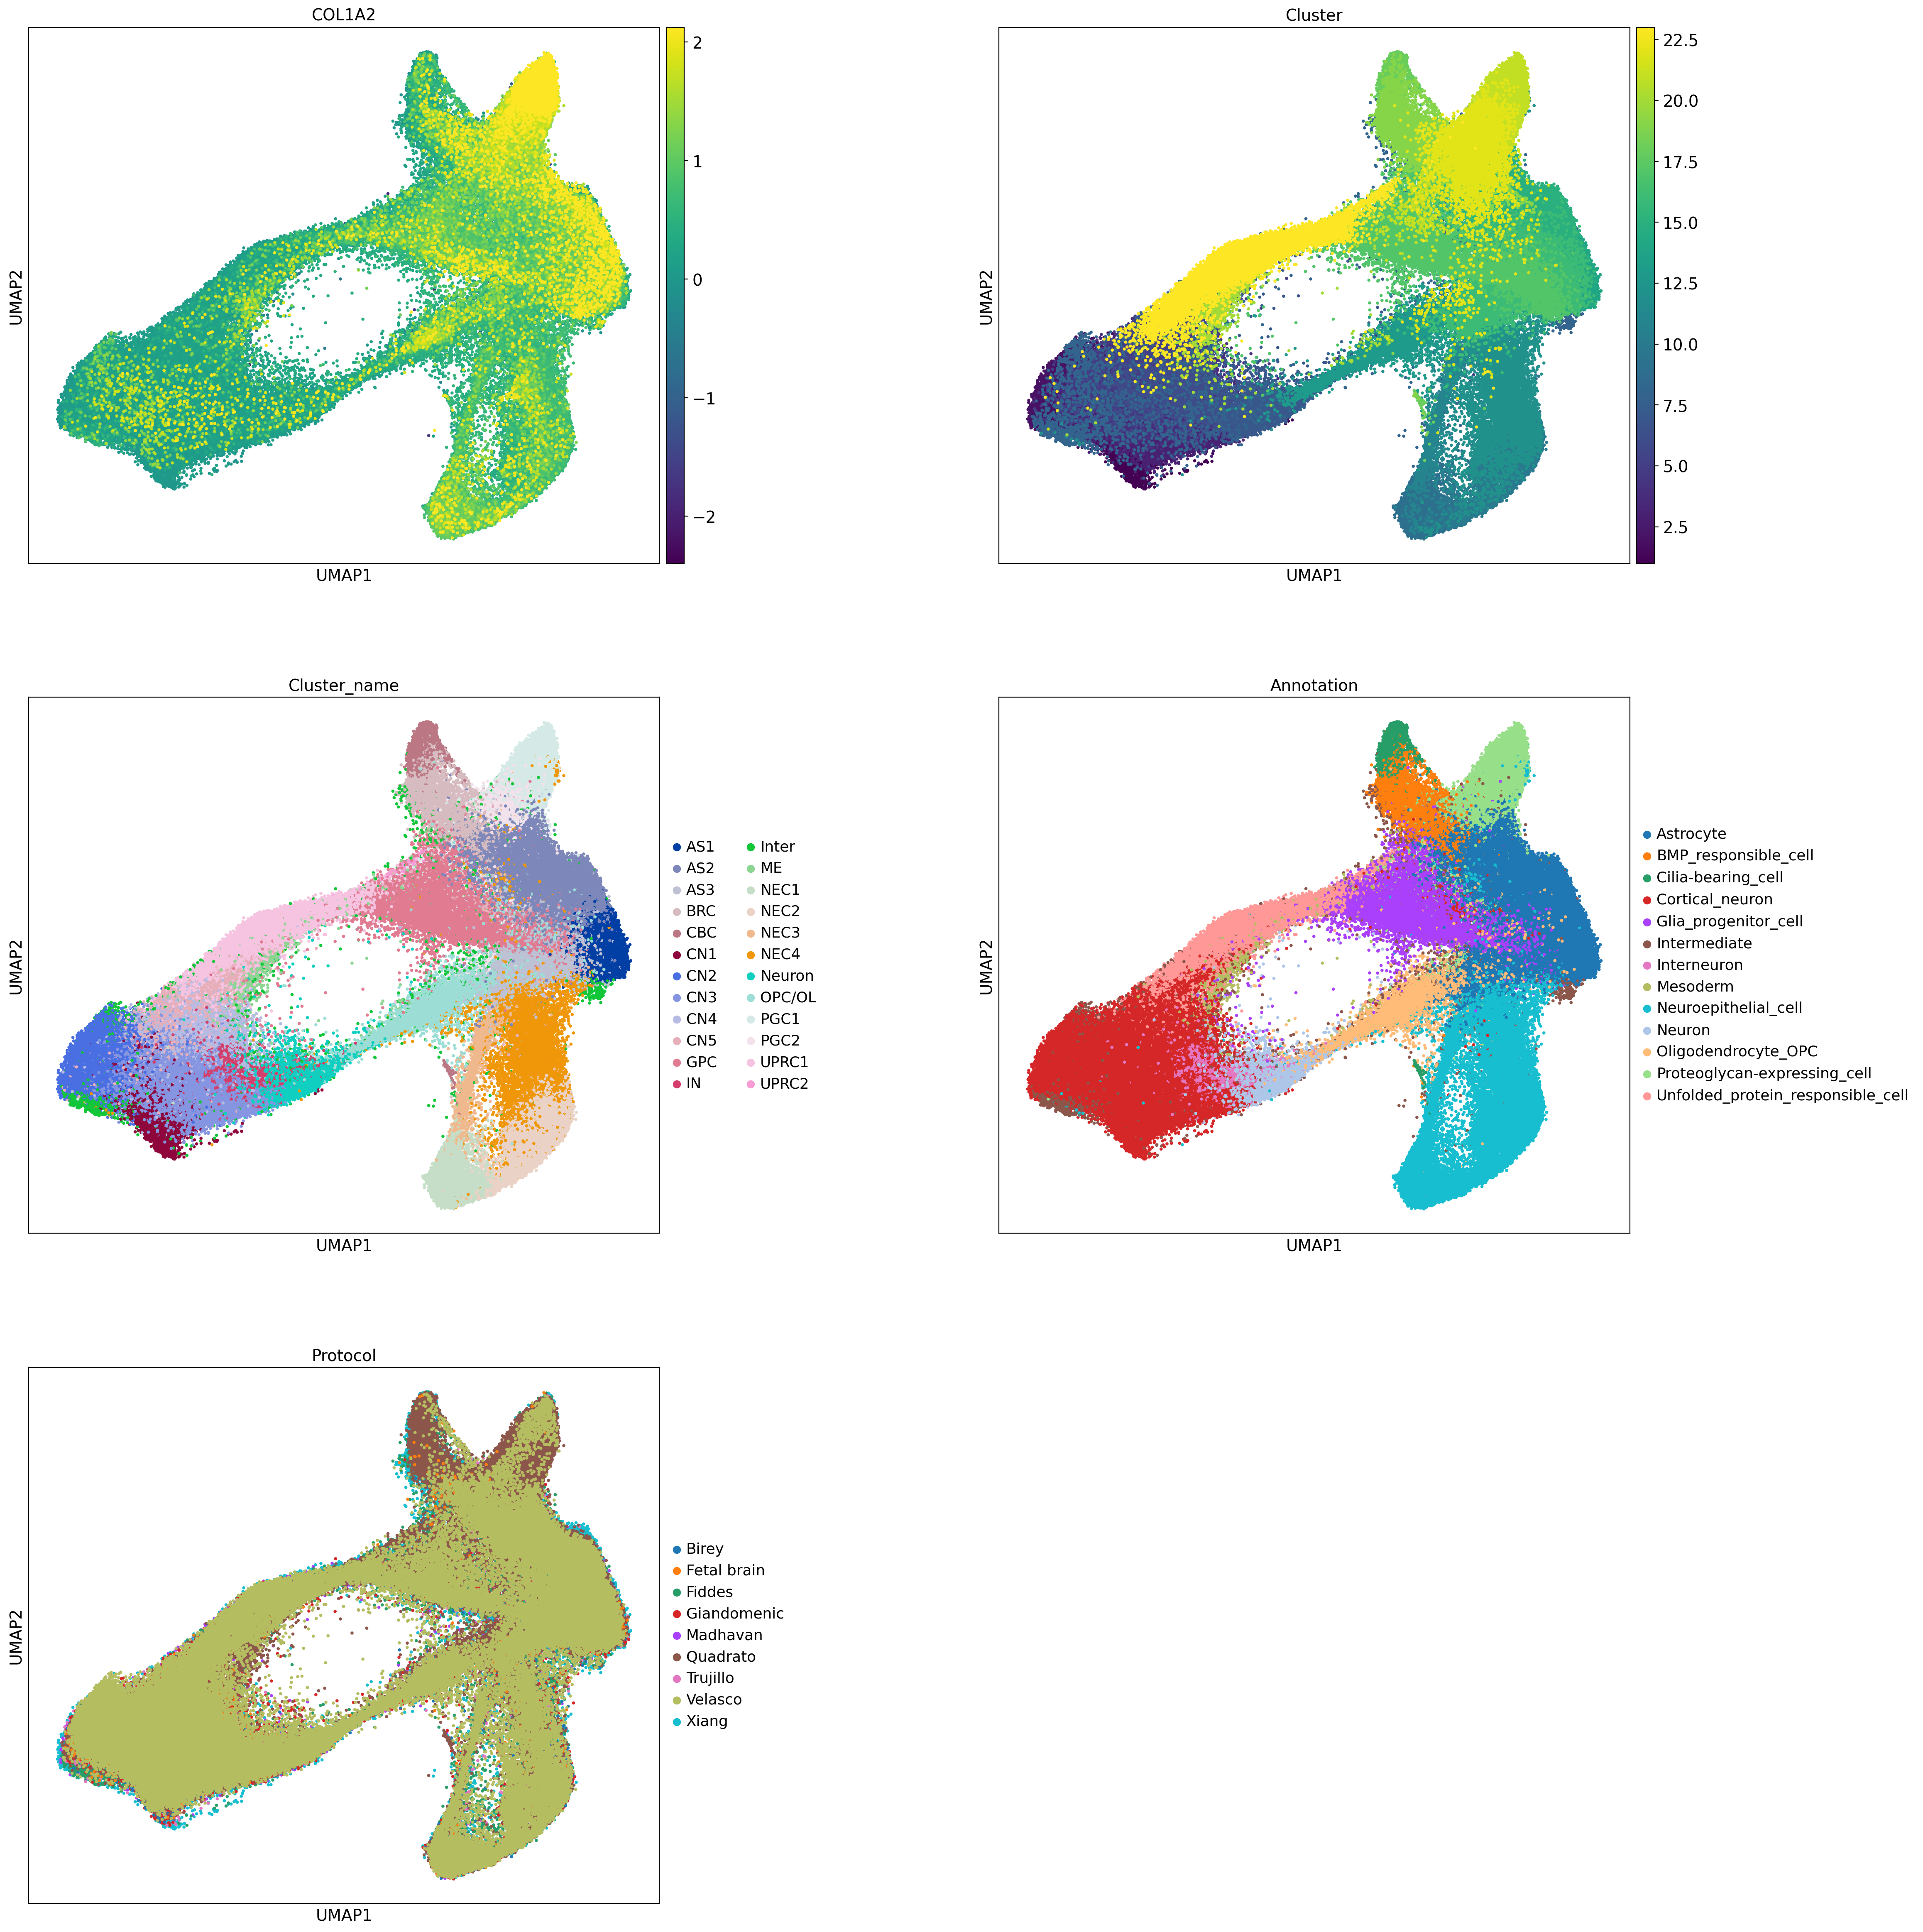

In [7]:
sc.pl.umap(Tanaka,color=["COL1A2","Cluster","Cluster_name","Annotation","Protocol"], size = 30, vmax='p98', ncols=2, wspace=.4)

/group/testa/Users/davide.castaldi/Polaroid_publication_revisions/.local/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:836: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/group/testa/Users/davide.castaldi/Polaroid_publication_revisions/.local/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:836: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/group/testa/Users/davide.castaldi/Polaroid_publication_revisions/.local/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:836: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/group/testa/Users/davide.

/group/testa/Users/davide.castaldi/Polaroid_publication_revisions/.local/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:836: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/group/testa/Users/davide.castaldi/Polaroid_publication_revisions/.local/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:836: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/group/testa/Users/davide.castaldi/Polaroid_publication_revisions/.local/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:836: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/group/testa/Users/davide.

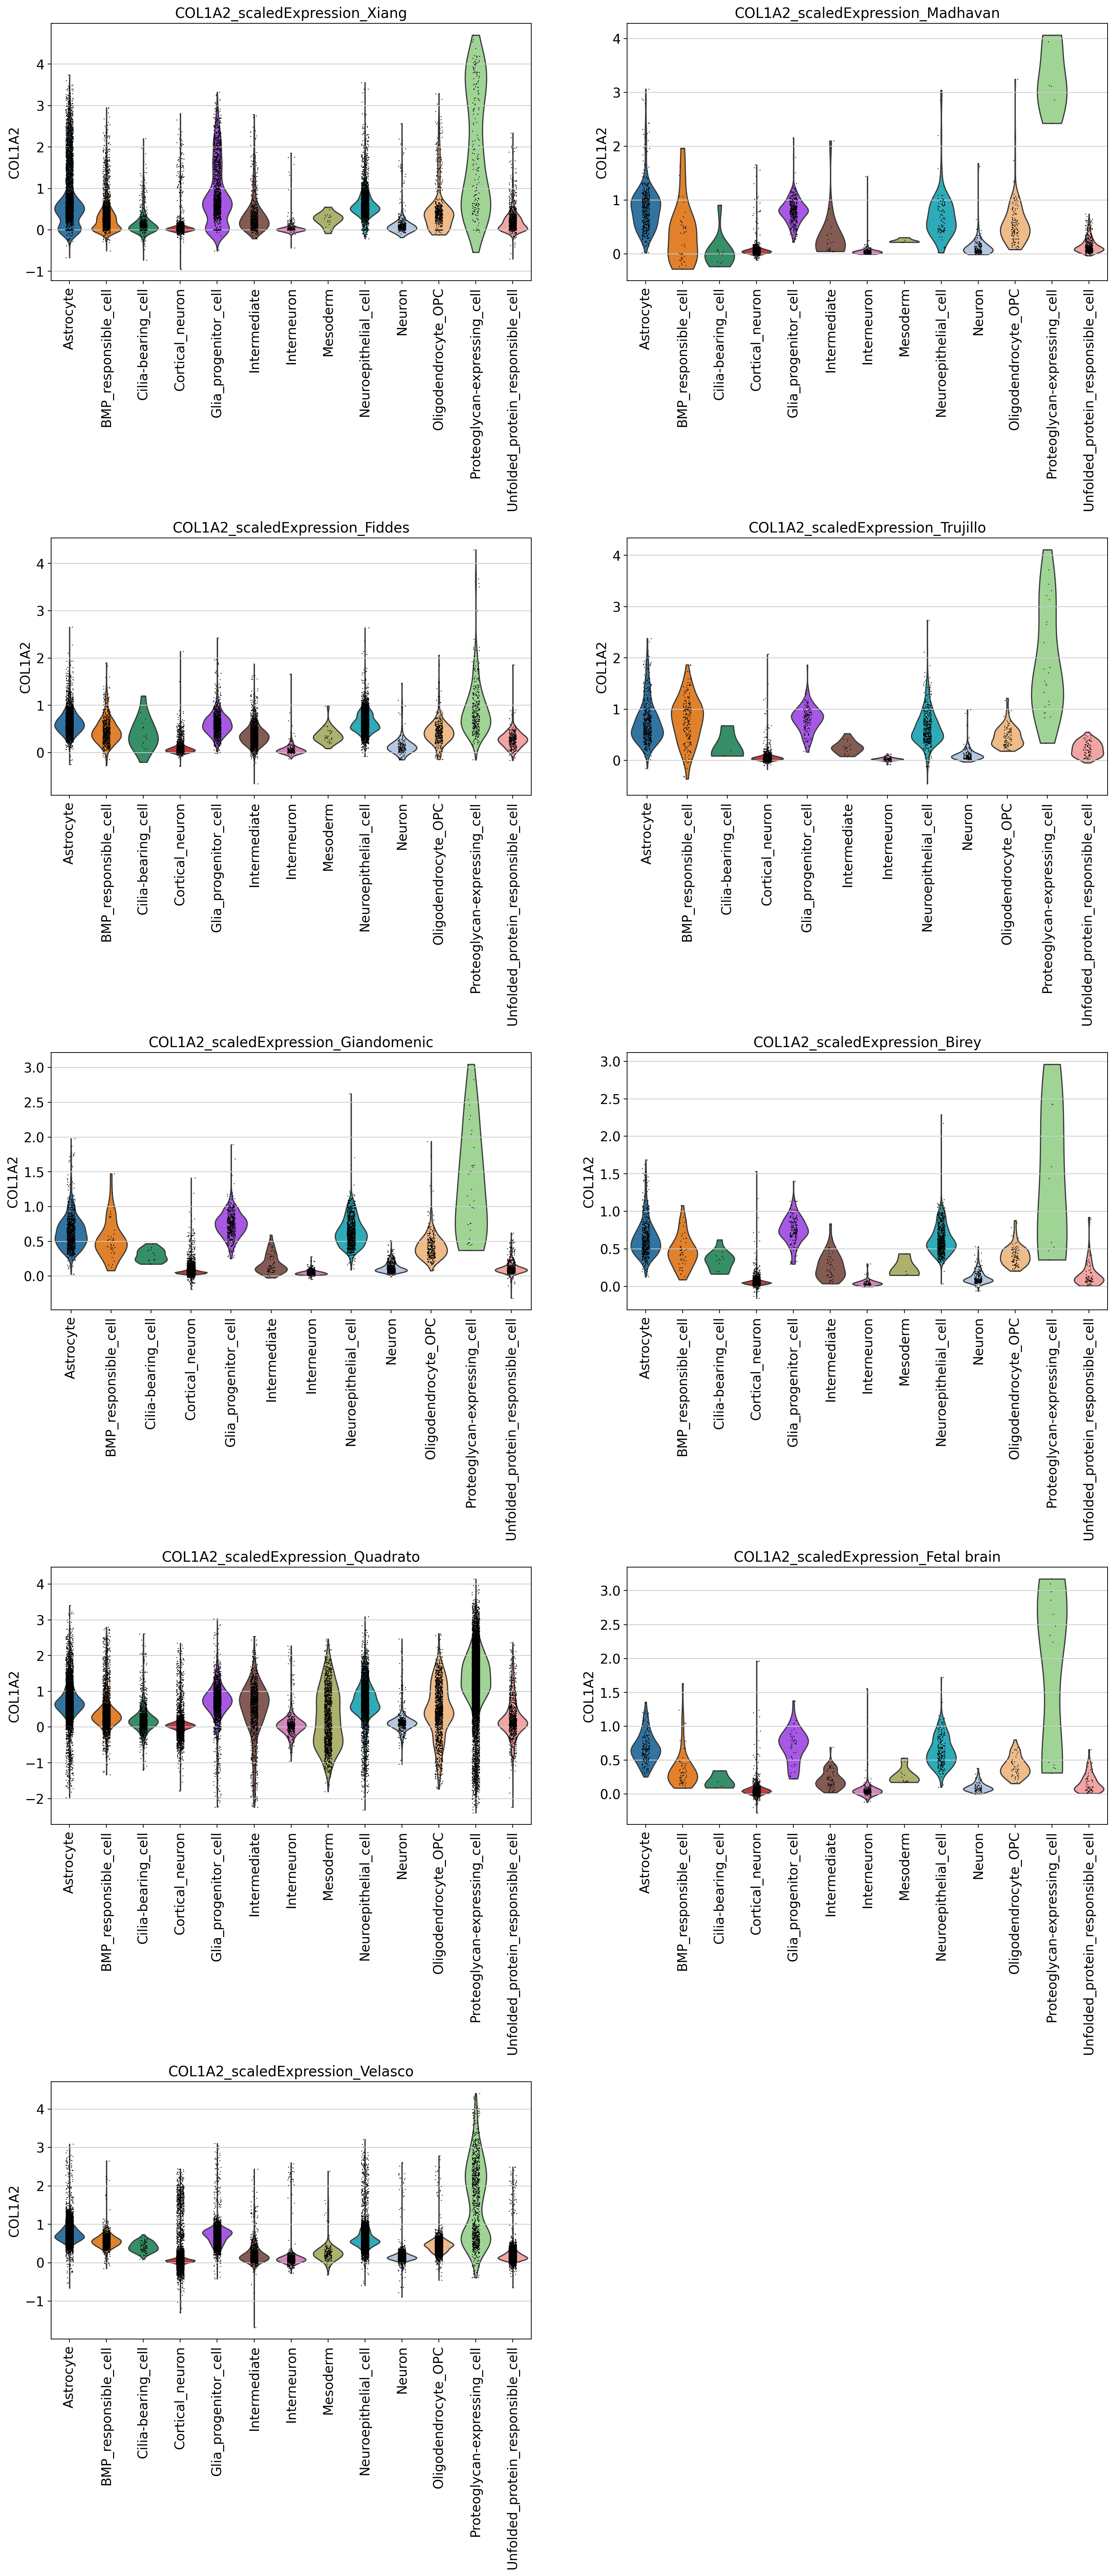

In [8]:
import matplotlib.pyplot as plt
sc.settings.set_figure_params(dpi=100, facecolor='white', dpi_save=500)
pylab.rcParams['figure.figsize'] = (5, 5)
fig, axes = plt.subplots(5,2, figsize=(20,45))
plt.subplots_adjust(hspace=1)

for i,p in enumerate(Tanaka.obs["Protocol"].unique().tolist()):
    sc.pl.violin(Tanaka[Tanaka.obs["Protocol"] == p], keys="COL1A2", groupby="Annotation", 
                 rotation=90, show=False, ax = axes.flatten()[i])
    axes.flatten()[i].set_title("COL1A2_scaledExpression_{}".format(p), fontdict={'fontsize': 15, 'fontweight': 'medium'})
fig.delaxes(ax = axes.flatten()[-1])
plt.show()
fig.savefig("./figures/COL1A2_tanaka.png", dpi=300)


# Plot COL1A2 for polCAs

In [10]:
polCAs = sc.read("./outdir/3_polaroid_quickAnno.h5ad")
polCAs.obs["Protocol"] = "polCAs"

In [11]:
sc.pp.scale(polCAs)

/group/testa/Users/davide.castaldi/Polaroid_publication_revisions/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/group/testa/Users/davide.castaldi/Polaroid_publication_revisions/.local/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:836: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/group/testa/Users/davide.castaldi/Polaroid_publication_revisions/.local/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:836: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


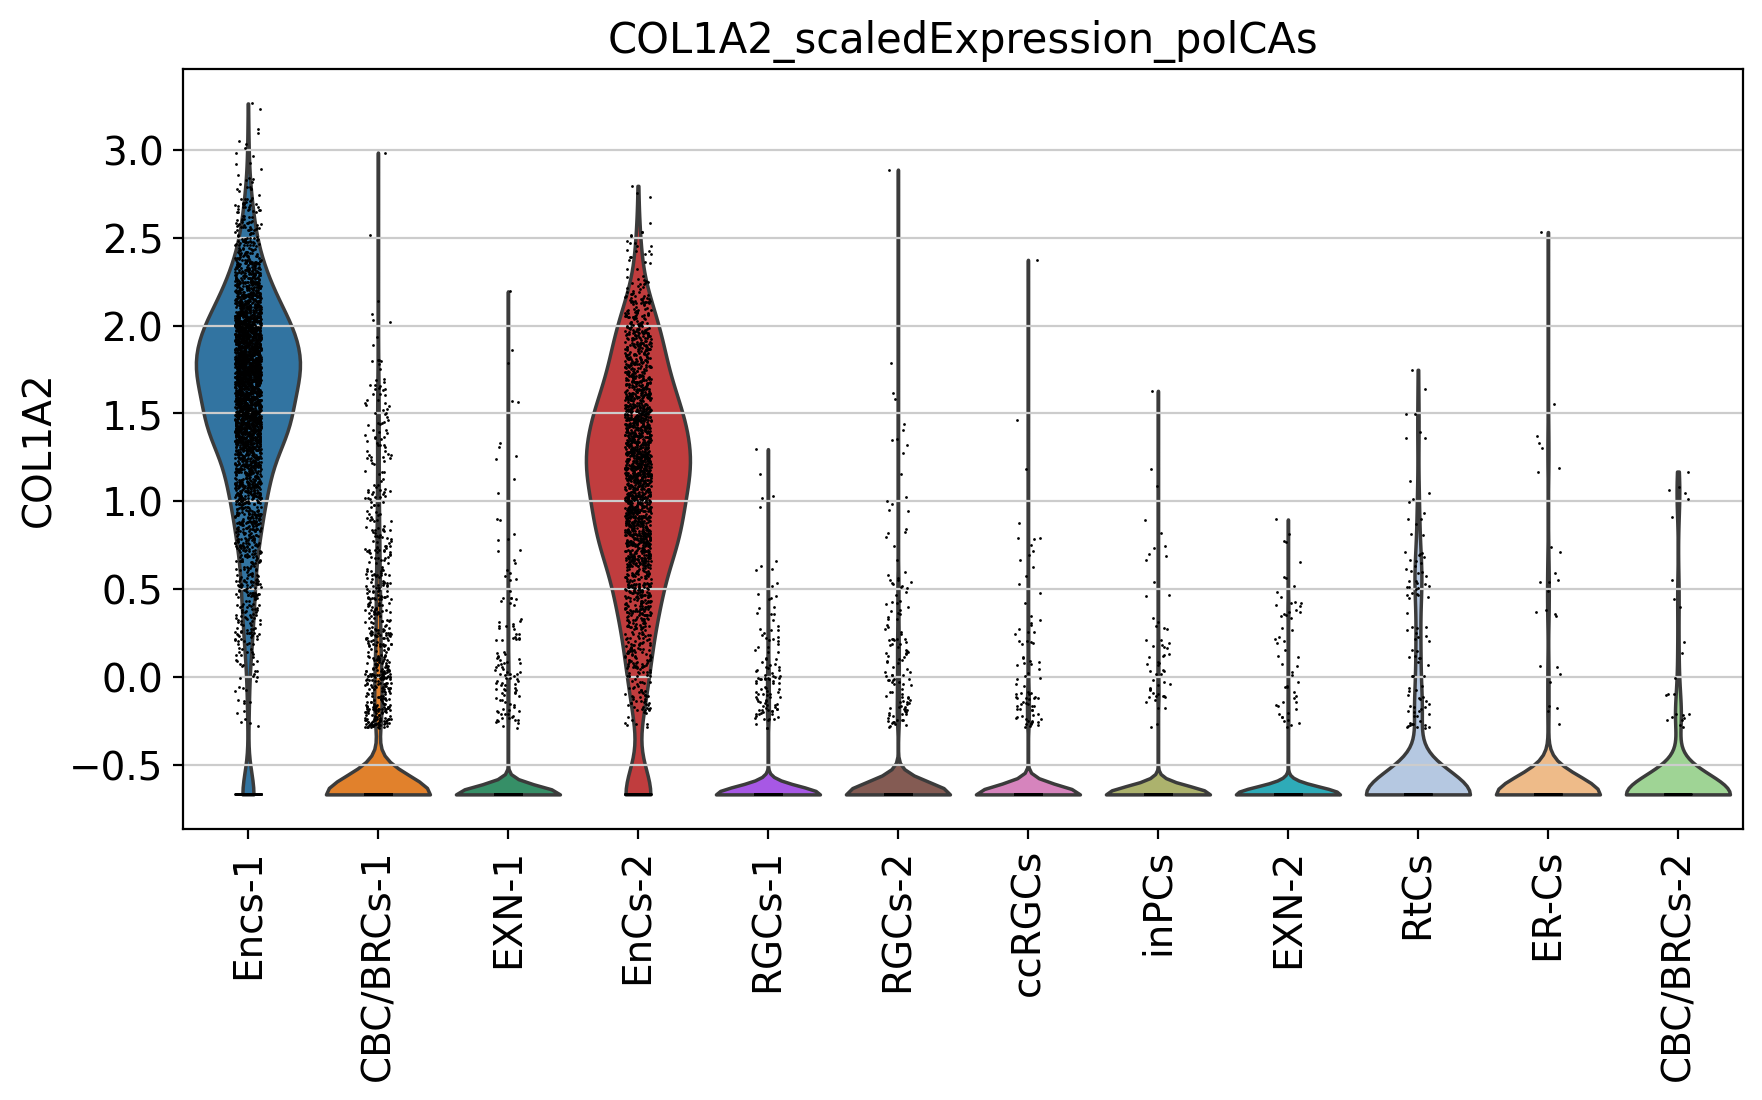

In [12]:
import matplotlib.pyplot as plt
sc.settings.set_figure_params(dpi=100, facecolor='white', dpi_save=500)
pylab.rcParams['figure.figsize'] = (5, 5)
fig, axes = plt.subplots(1,1, figsize=(10,5))
plt.subplots_adjust(hspace=1)

for i,p in enumerate(polCAs.obs["Protocol"].unique().tolist()):
    sc.pl.violin(polCAs[polCAs.obs["Protocol"] == p], keys="COL1A2", groupby="leidenAnno", use_raw=False,
                 rotation=90, show=False, ax = axes)
    axes.set_title("COL1A2_scaledExpression_{}".format(p), fontdict={'fontsize': 15, 'fontweight': 'medium'})

plt.show()
fig.savefig("./figures/COL1A2_polCAs.png", dpi=300)